# Steps of Machine Learning: Feature Engineering Pipeline 

A machine learning pipeline is the end-to-end construct that arranges the flow of data into, and output from, a machine learning model (or set of multiple models). It includes raw data input, features, outputs, the machine learning model and model parameters, and prediction outputs.


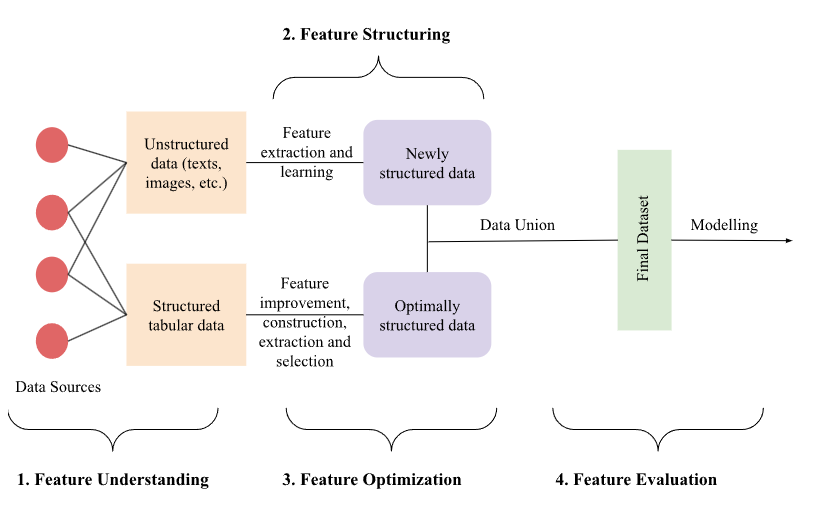

# Why are pipelines used in machine learning?

* Modularization: Pipelines allow you to break down the machine learning process into modular, well-defined steps. Each step can be developed, tested and optimized independently, making it easier to manage and maintain the workflow.

* Reproducibility: Machine learning pipelines make it easier to reproduce experiments. By defining the sequence of steps and their parameters in a pipeline, you can recreate the entire process exactly, ensuring consistent results. If a step fails or a model's performance deteriorates, the pipeline can be configured to raise alerts or take corrective actions.

* Efficiency: Pipelines automate many routine tasks, such as data preprocessing, feature engineering and model evaluation. This efficiency can save a significant amount of time and reduce the risk of errors.

* Scalability: Pipelines can be easily scaled to handle large datasets or complex workflows. As data and model complexity grow, you can adjust the pipeline without having to reconfigure everything from scratch, which can be time-consuming.

* Experimentation: You can experiment with different data preprocessing techniques, feature selections, and models by modifying individual steps within the pipeline. This flexibility allows for rapid iteration and optimization.

* Deployment: Pipelines facilitate the deployment of machine learning models into production. Once you've established a well-defined pipeline for model training and evaluation, you can easily integrate it into your application or system.

* Collaboration: Pipelines make it easier for teams of data scientists and engineers to collaborate. Since the workflow is structured and documented, it's easier for team members to understand and contribute to the project.

* Version control and documentation: You can use version control systems to track changes in your pipeline's code and configuration, ensuring that you can roll back to previous versions if needed. A well-structured pipeline encourages better documentation of each step.

### Importing and Understanding the Data

In [1]:
import pandas as pd

In [2]:
data = pd.read_csv("DAAssignment.csv", usecols= ['Group', 'Status', 'Priority', 'Via',
       'Satisfaction Score', 'Reopens',
       'Replies', 'First reply time in minutes within business hours',
       'First resolution time in minutes',
       'First resolution time in minutes within business hours',
       'Full resolution time in minutes',
       'Full resolution time in minutes within business hours',
       'Requester wait time in minutes',
       'Requester wait time in minutes within business hours'])
print(data.columns)
print(data.shape)

Index(['Group', 'Status', 'Priority', 'Via', 'Satisfaction Score', 'Reopens',
       'Replies', 'First reply time in minutes within business hours',
       'First resolution time in minutes',
       'First resolution time in minutes within business hours',
       'Full resolution time in minutes',
       'Full resolution time in minutes within business hours',
       'Requester wait time in minutes',
       'Requester wait time in minutes within business hours'],
      dtype='object')
(16476, 14)


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16476 entries, 0 to 16475
Data columns (total 14 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   Group                                                   16476 non-null  object 
 1   Status                                                  16476 non-null  object 
 2   Priority                                                16476 non-null  object 
 3   Via                                                     16476 non-null  object 
 4   Satisfaction Score                                      5453 non-null   object 
 5   Reopens                                                 16476 non-null  int64  
 6   Replies                                                 16476 non-null  int64  
 7   First reply time in minutes within business hours       12760 non-null  float64
 8   First resolution time in minutes    

### Calculating and Removing Duplicate values

In [4]:
data.duplicated().sum()

910

In [5]:
data = data.drop_duplicates().reset_index()
data = data.drop(columns=["index"])

In [6]:
data.shape

(15566, 14)

In [7]:
data

,Group,Status,Priority,Via,Satisfaction Score,Reopens,Replies,First reply time in minutes within business hours,First resolution time in minutes,First resolution time in minutes within business hours,Full resolution time in minutes,Full resolution time in minutes within business hours,Requester wait time in minutes,Requester wait time in minutes within business hours
0,Support,Solved,Low,Mail,Offered,11,11,173.0,12975.0,6488.0,96218.0,47978.0,17853.0,8516.0
1,Reimbursement Claims,Closed,Low,Mail,NaN,10,10,1527.0,2984.0,1527.0,45893.0,22853.0,30113.0,15139.0
2,Support,Solved,Low,Mail,4,10,11,61.0,1563.0,843.0,19993.0,9913.0,7115.0,3335.0
3,Support,Solved,Low,Mail,Offered,9,9,381.0,2888.0,1448.0,91313.0,45953.0,18221.0,9401.0
4,Support,Closed,Low,Mail,4,9,9,37.0,37.0,37.0,36304.0,17739.0,7427.0,4008.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15561,Support,Solved,Low,Mail,Offered,0,1,69.0,692.0,69.0,692.0,69.0,692.0,69.0
15562,Support,Solved,Low,Mail,Offered,0,3,90.0,6422.0,2929.0,6422.0,2929.0,6422.0,2930.0
15563,Support,Hold,Low,Mail,NaN,0,1,69.0,NaN,NaN,NaN,NaN,653.0,69.0
15564,Reimbursement Claims,Solved,Low,Mail,NaN,0,2,280.0,12548.0,6223.0,12548.0,6223.0,12547.0,6223.0


In [8]:
data.isnull().mean()*100

Group                                                      0.000000
Status                                                     0.000000
Priority                                                   0.000000
Via                                                        0.000000
Satisfaction Score                                        65.867917
Reopens                                                    0.000000
Replies                                                    0.000000
First reply time in minutes within business hours         19.112168
First resolution time in minutes                           9.552872
First resolution time in minutes within business hours     9.552872
Full resolution time in minutes                           12.283181
Full resolution time in minutes within business hours     12.283181
Requester wait time in minutes                             0.077091
Requester wait time in minutes within business hours       0.077091
dtype: float64

# Understanding Categorical data

In [43]:
data["Priority"].value_counts()

Low       15373
Urgent      181
Normal       12
Name: Priority, dtype: int64

In [28]:
data["Group"].value_counts()

Endorsements            5903
Support                 5530
Reimbursement Claims    3604
Onboardings              529
Name: Group, dtype: int64

In [29]:
data["Via"].value_counts()

Mail                      12754
Internal Communication     1928
OutBound                    584
Closed Ticket               300
Name: Via, dtype: int64

In [30]:
data["Status"].value_counts()

Closed     11548
Solved      2106
Hold         777
Pending      663
Open         469
New            3
Name: Status, dtype: int64

In [31]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Reopens,15566.0,0.257099,0.723125,0.0,0.00,0.0,0.00,11.0
Replies,15566.0,2.267185,2.713730,0.0,1.00,2.0,3.00,36.0
First reply time in minutes within business hours,12591.0,1871.528393,3937.530229,0.0,125.00,489.0,1957.50,52770.0
First resolution time in minutes,14079.0,10647.197528,15430.541414,0.0,1238.00,4634.0,12896.50,108322.0
First resolution time in minutes within business hours,14079.0,5367.473187,7718.114247,0.0,593.00,2368.0,6480.00,54322.0
Full resolution time in minutes,13654.0,12916.303135,17206.116345,0.0,1640.25,6125.5,16467.50,108322.0
Full resolution time in minutes within business hours,13654.0,6498.490772,8600.186423,0.0,856.00,3124.0,8369.75,54322.0
Requester wait time in minutes,15554.0,10878.235245,16047.344669,0.0,1245.25,4556.0,13054.75,108942.0
Requester wait time in minutes within business hours,15554.0,5478.055291,8011.174301,0.0,620.00,2307.5,6482.00,54355.0


# Creating the target variable

In [32]:
data['Satisfaction Category'] = data['Satisfaction Score'].apply(lambda x: 'Offered' if x in ['Offered', '4', '1', '2', '3', '5'] else 'Not Offered')

# Train/ Test Split

In [33]:
from sklearn.model_selection import train_test_split

In [40]:
train_input, test_input, train_target, test_target = train_test_split(data.drop(columns=["Satisfaction Score" ,"Satisfaction Category"]), data["Satisfaction Category"], test_size=0.2, random_state=42)

### Identifying Input and Target Columns

In [41]:
train_input.shape

(12452, 13)

In [42]:
train_input.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12452 entries, 6050 to 7270
Data columns (total 13 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   Group                                                   12452 non-null  object 
 1   Status                                                  12452 non-null  object 
 2   Priority                                                12452 non-null  object 
 3   Via                                                     12452 non-null  object 
 4   Reopens                                                 12452 non-null  int64  
 5   Replies                                                 12452 non-null  int64  
 6   First reply time in minutes within business hours       10092 non-null  float64
 7   First resolution time in minutes                        11259 non-null  float64
 8   First resolution time in minutes w

In [39]:
print("train_df.shape", train_input.shape)
print("test_df.shape", test_input.shape)

train_df.shape (12452, 14)
test_df.shape (3114, 14)


In [44]:
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

In [45]:
trf2 = ColumnTransformer(transformers=[
    # One Hot Encoding

    ("ohe_group", OneHotEncoder(sparse_output= False, handle_unknown="ignore"),[0]),
    # *Handle unknown categories with OneHotEncoder by encoding them as zeros*
    
    # Ordinal Encoding

    ("oe_status", OrdinalEncoder(categories=[['Solved', 'Closed', 'Hold', 'New', 'Pending', 'Open']]), [1]),
    ("oe_priority", OrdinalEncoder(categories=[['Low', 'Normal', 'Urgent']]), [2]),
    
    # One Hot Encoding

    ("ohe_via", OneHotEncoder(sparse_output= False, handle_unknown="ignore"),[3]),
    
    # Imputation Transformer
    
    ("imputing_first_reply_bh", SimpleImputer(strategy="mean"),[6]),
    ("imputing_first_resolution", SimpleImputer(strategy="mean"),[7]),
    ("imputing_first_resolution_bh", SimpleImputer(strategy="mean"),[8]),
    ("imputing_full_resolution", SimpleImputer(strategy="mean"),[9]),
    ("imputing_full_resolution_bh", SimpleImputer(strategy="mean"),[10]),
    ("imputing_requester_wait", SimpleImputer(strategy="mean"),[11]),
    ("imputing_requester_wait_bh", SimpleImputer(strategy="mean"),[12])
],remainder="passthrough")

In [64]:
trf2.get_params

<bound method ColumnTransformer.get_params of ColumnTransformer(remainder='passthrough',
                  transformers=[('ohe_group',
                                 OneHotEncoder(handle_unknown='ignore',
                                               sparse_output=False),
                                 [0]),
                                ('oe_status',
                                 OrdinalEncoder(categories=[['Solved', 'Closed',
                                                             'Hold', 'New',
                                                             'Pending',
                                                             'Open']]),
                                 [1]),
                                ('oe_priority',
                                 OrdinalEncoder(categories=[['Low', 'Normal',
                                                             'Urgent']]),
                                 [2]),
                                ('ohe_via',
                

In [46]:
from sklearn.preprocessing import MinMaxScaler

In [47]:

# Scaling
trf3 = ColumnTransformer([
    ('scale',MinMaxScaler(),slice(0,18))
])

In [48]:
# Label Encoder (for Categorical Targets Only)
le = LabelEncoder()
le.fit(train_target)

LabelEncoder()

In [49]:
train_target = le.transform(train_target)
test_target = le.transform(test_target)

### Creating classifier using LogisticRegression

In [50]:
from sklearn.linear_model import LogisticRegression

In [51]:
clf = LogisticRegression(solver='liblinear', random_state=42)

# Creating Pipeline

#### **Pipeline Vs make_pipeline**

Pipeline requires naming of steps, make_pipeline does not.

(Same applies to ColumnTransformer vs make_column_transformer)

In [52]:
from sklearn.pipeline import Pipeline

In [54]:
pipe = Pipeline([
    ('trf2',trf2),
    ('trf3',trf3),
    ('clf', clf)
])

In [55]:
pipe.fit(train_input, train_target)

Pipeline(steps=[('trf2',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe_group',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  [0]),
                                                 ('oe_status',
                                                  OrdinalEncoder(categories=[['Solved',
                                                                              'Closed',
                                                                              'Hold',
                                                                              'New',
                                                                              'Pending',
                                                                              'Open']]),
                                                  [1]),
                                                 ('oe_priority',
                                                  OrdinalEncoder(categories=[['Low',
                                                                              'Normal',
                                                                              'Urgent']]),
                                                  [2]),
                                                 ('ohe_via',
                                                  OneHotEnco...
                                                 ('imputing_full_resolution',
                                                  SimpleImputer(), [9]),
                                                 ('imputing_full_resolution_bh',
                                                  SimpleImputer(), [10]),
                                                 ('imputing_requester_wait',
                                                  SimpleImputer(), [11]),
                                                 ('imputing_requester_wait_bh',
                                                  SimpleImputer(), [12])])),
                ('trf3',
                 ColumnTransformer(transformers=[('scale', MinMaxScaler(),
                                                  slice(0, 18, None))])),
                ('clf',
                 LogisticRegression(random_state=42, solver='liblinear'))])

In [56]:
pipe.named_steps

{'trf2': ColumnTransformer(remainder='passthrough',
                   transformers=[('ohe_group',
                                  OneHotEncoder(handle_unknown='ignore',
                                                sparse_output=False),
                                  [0]),
                                 ('oe_status',
                                  OrdinalEncoder(categories=[['Solved', 'Closed',
                                                              'Hold', 'New',
                                                              'Pending',
                                                              'Open']]),
                                  [1]),
                                 ('oe_priority',
                                  OrdinalEncoder(categories=[['Low', 'Normal',
                                                              'Urgent']]),
                                  [2]),
                                 ('ohe_via',
                                  OneH

In [ ]:
from sklearn.metrics import accuracy_score

In [62]:
train_pred = pipe.predict(train_input)
train_pred

array([0, 0, 0, ..., 0, 1, 0])

In [63]:
accuracy_score(train_target,train_pred)

0.9943784131063284

You can `cross-validate` and `grid search` the entire pipeline!

Preprocessing steps will automatically occur **AFTER** each cross-validation split, which is critical if you want meaningful scores.

# Cross validation using cross_val_score


In [59]:
from sklearn.model_selection import cross_val_score
cross_val_score(pipe, train_input, train_target, cv=5, scoring='accuracy').mean()

0.9940572567266255

### Prediction on test set

In [57]:
test_pred = pipe.predict(test_input)
test_pred

array([1, 0, 0, ..., 0, 0, 0])

In [58]:
accuracy_score(test_target,test_pred)

0.9942196531791907

# Find optimal tuning parameters for the entire pipeline


In [66]:
from sklearn.model_selection import GridSearchCV

### Try all possible combinations of those parameter values


In [70]:
param_grid = {
    'trf2__imputing_first_reply_bh__strategy': ['mean', 'median'],
    'trf2__imputing_first_resolution__strategy': ['mean', 'median'],
    'trf2__imputing_first_resolution_bh__strategy': ['mean', 'median'],
    'trf2__imputing_full_resolution__strategy': ['mean', 'median'],
    'trf2__imputing_full_resolution_bh__strategy': ['mean', 'median'],
    'trf2__imputing_requester_wait__strategy': ['mean', 'median'],
    'trf2__imputing_requester_wait_bh__strategy': ['mean', 'median'],
    'clf__C': [0.1, 1.0, 10, 100]
}

grid_search = GridSearchCV(pipe, param_grid, cv=10)

In [71]:
grid_search.fit(train_input, train_target)

print(f"Best params:")
print(grid_search.best_params_)

Best params:
{'clf__C': 100, 'trf2__imputing_first_reply_bh__strategy': 'mean', 'trf2__imputing_first_resolution__strategy': 'mean', 'trf2__imputing_first_resolution_bh__strategy': 'mean', 'trf2__imputing_full_resolution__strategy': 'mean', 'trf2__imputing_full_resolution_bh__strategy': 'mean', 'trf2__imputing_requester_wait__strategy': 'mean', 'trf2__imputing_requester_wait_bh__strategy': 'mean'}


### What was the best score found during the search?

In [72]:
print(f"Internal CV score: {grid_search.best_score_:.3f}")

Internal CV score: 1.000


Machine Learning Pipeline Steps

Step 1: Data Preprocessing

Step 2: Data Cleaning

Step 3: Feature Engineering

Step 4: Model Selection

Step 5: Prediction Generation

Reasons to use scikit-learn (not pandas) for ML preprocessing:
1. You can cross-validate the entire workflow
2. You can grid search model & preprocessing hyperparameters
3. Avoids adding new columns to the source DataFrame
4. pandas lacks separate fit/transform steps to prevent data leakage